In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
### Some functions for plotting.

def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)

In [49]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)

In [50]:
def r_table(r, num_points=1000):
    """
    Generate a table of N data points with a correlation approximately r
    """
    np.random.seed(8)
    x = np.random.normal(0, 1, num_points)
    z = np.random.normal(0, 1, num_points)
    y = r*x + (np.sqrt(1-r**2))*z
    return Table().with_columns('x', x, 'y', y)

Discussion question

A course has a midterm (average 70; standard deviation 10)and a really hard final (average 50; standard deviation 12)
If the scatter diagram comparing midterm & final scores for students has an oval shape with correlation 0.75, then... 
What do you expect the average final score would be for students who scored 90 on the midterm?
How about 60 on the midterm?


In [5]:
avg_x=70
st_x=10
avg_y=50
st_y=12
r=0.75



In [6]:
s1_x=90

su_x_1=(s1_x-avg_x)/st_x
print(su_x_1)


s1_y_su=r*su_x_1
#print(su_x_1,s1_y_su)

#remember su_y=Orig_y-avg_y/Stdev_y, so original y==>Orig_y=su_y*stdev_y+avg_y
orig_y_s1=s1_y_su*st_y+avg_y
print(orig_y_s1)

2.0
68.0


In [7]:
s2_x=60


su_x_2=(s2_x-avg_x)/st_x
#print(su_x_2)


s2_y=r*su_x_2
s2_y
orig_y_s2=s2_y*st_y+avg_y
print(orig_y_s2)

41.0


## Prediction lines

let's simulate different shaped scatter plots with different values of r, and see how the regression line changes. In each case, the red 45 degree line has been drawn for comparison.

In [8]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


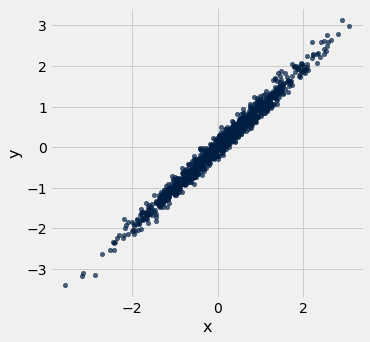

In [9]:
example.scatter('x', 'y')

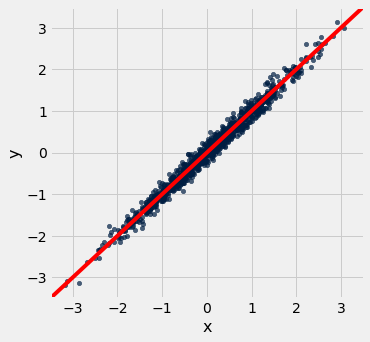

In [10]:
example.scatter('x', 'y')
draw_line(slope=1, color='red')
resize_window()

In [11]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))
    

In [12]:
nn_prediction_example(-2.25)

-2.1476337989800522

In [13]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

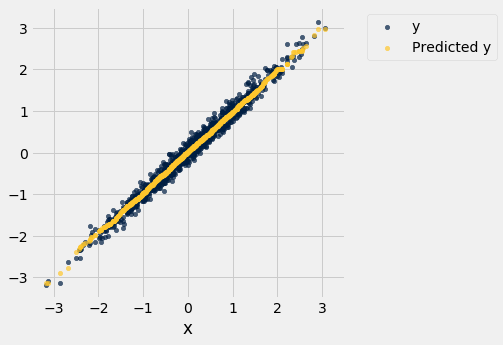

In [14]:
example.scatter('x')
#draw_line(slope=1, color='red')
resize_window()

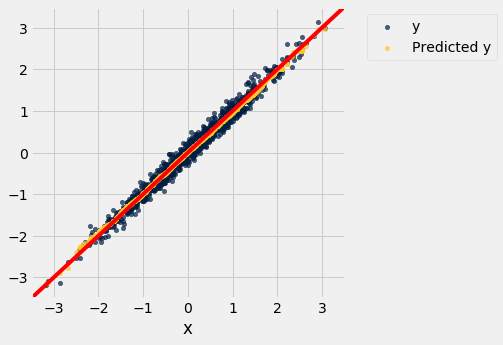

In [15]:
example.scatter('x')
draw_line(slope=1, color='red')
resize_window()

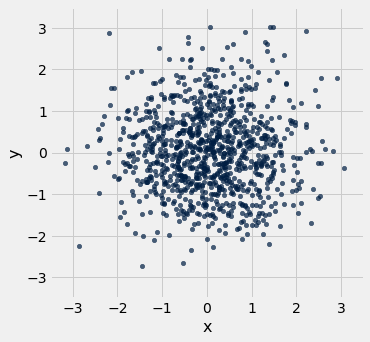

In [16]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [17]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

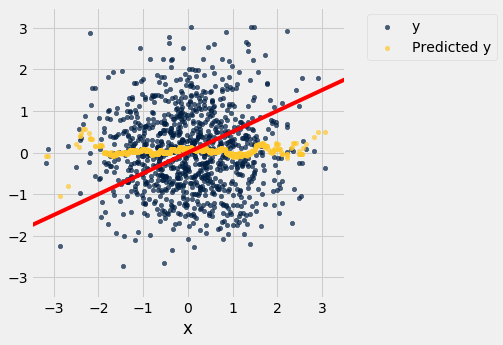

In [18]:
example = example.with_column(
    'Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=.5, color='red')
#draw_line(slope = 0)
resize_window()

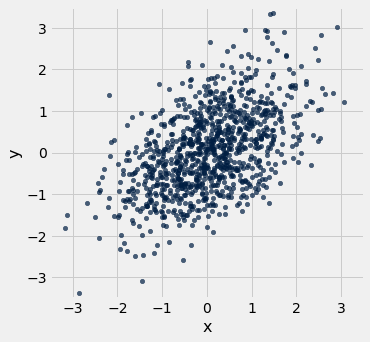

In [19]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

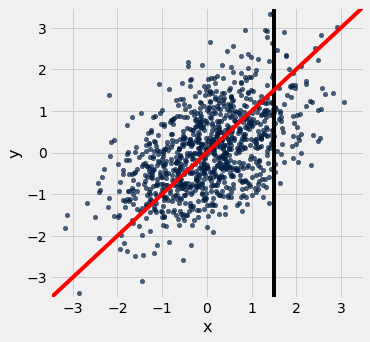

In [20]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_vertical_line(1.5)
draw_line(slope=1, intercept=0)

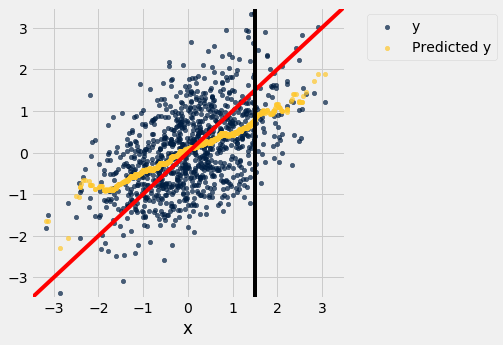

In [21]:
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1)
draw_vertical_line(1.5)
resize_window()

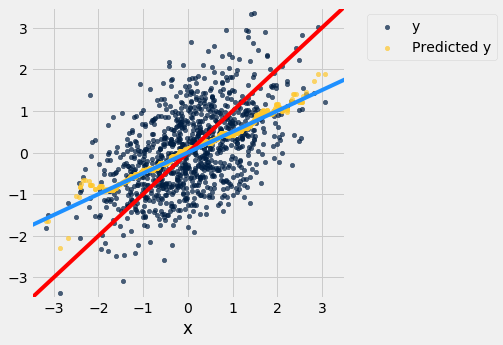

In [22]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0, color='dodgerblue')
resize_window()

## Linear regression: defining the line

In [23]:
def standard_units(arr):
    ...

def correlation(t, x, y):
    ...

def slope(t, x, y):
    ...

def intercept(t, x, y):
    ...

In [59]:
def correlation(t, label_x, label_y):
    xsu=standard_units(t.column(label_x))
    ysu=standard_units(t.column(label_y))
    return np.mean(xsu*ysu)

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [62]:
example = r_table(0.5)
#t=example
#xsu=(t.column('x') - np.mean(t.column('x')))/np.std(t.column('x'))
#ysu=(t.column('y') - np.mean(t.column('y')))/np.std(t.column('y'))
#r=np.mean(xsu)*ysu
print(correlation(example, 'x', 'y'))
print(slope(example, 'x', 'y'))
print(intercept(example, 'x', 'y'))

0.5152780462958955
0.5022638281625915
0.03801479544542581


## Galton height data

In [34]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [35]:
def nn_prediction_galton(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    neighbors = heights.where(
        'MidParent', are.between(h - 0.5, h + 0.5))
    return np.mean(neighbors.column('Child'))

In [36]:
heights_with_predictions = heights.with_column(
    'Average neighbor prediction', 
    heights.apply(nn_prediction_galton, 'MidParent'))

In [63]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [ ]:
### Make prediction for child height


In [65]:
heights_with_predictions.where('MidParent', are.equal_to(69.48))

MidParent,Child,Average neighbor prediction
69.48,64,66.7588
69.48,74,66.7588
69.48,72,66.7588
69.48,69,66.7588
69.48,67.5,66.7588
69.48,63.5,66.7588
69.48,72,66.7588
69.48,71.5,66.7588
69.48,71.5,66.7588
69.48,70,66.7588


In [66]:
heights_with_predictions = heights_with_predictions.with_column('Regression Prediction', galton_slope*heights.column('MidParent') + galton_intercept)
heights_with_predictions

MidParent,Child,Average neighbor prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


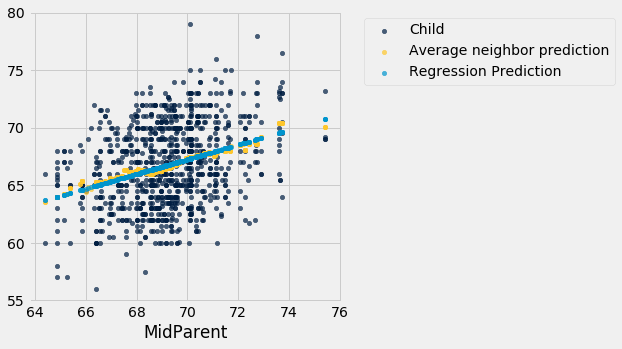

In [67]:
heights_with_predictions.scatter('MidParent')

Our original prediction, created by taking the average height of all children who had midparent heights close to 70.48, came out to be pretty close: 67.63 inches compared to the regression line's prediction of 67.55 inches.

In [68]:
heights_with_predictions.where('MidParent', are.equal_to(70.48)).show(3)

MidParent,Child,Average neighbor prediction,Regression Prediction
70.48,74,67.6342,67.5574
70.48,70,67.6342,67.5574
70.48,68,67.6342,67.5574
